## Analysis of CATE Estimates

In this notebook, Conditional Average Treatment Effect (CATE) estimates using different learners (S-learner, T-learner, X-learner, and R-learner) are analyzed. The correlations between these estimates for two different hypotheses, denoted as `p` and `k` is visualized.

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

s_predictions = pd.read_csv('../../results/benchmark_data_results/test_data/s_learner_cate_p.csv')
t_predictions = pd.read_csv('../../results/benchmark_data_results/test_data/t_learner_cate_p.csv')
x_predictions = pd.read_csv('../../results/benchmark_data_results/test_data/x_learner_cate_p.csv')
r_predictions = pd.read_csv('../../results/benchmark_data_results/test_data/r_learner_cate_p.csv')

# we merge the predictions into a single dataframe
merged_data = pd.concat([
    s_predictions[['s_cate_p']],
    t_predictions[['t_cate_p']],
    x_predictions[['x_cate_p']],
    r_predictions[['r_cate_p']]
], axis=1)

The heatmaps shows the correlation between the CATE estimates from different learners for hypothesis `p`. High correlation values indicate that the estimates from different learners are similar, while low correlation values indicate differences.


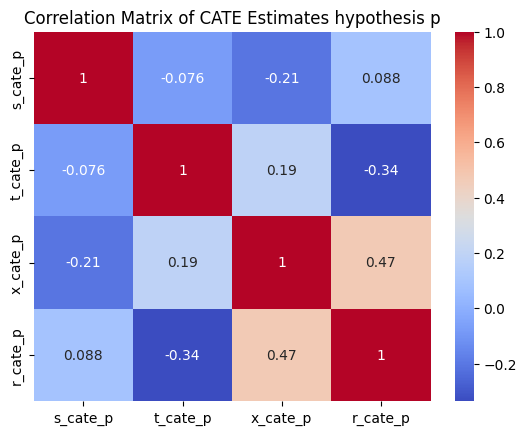

In [6]:
# Plot correlations between different CATE predictions
corr = merged_data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of CATE Estimates hypothesis p')
plt.show()

The correlation matrix for Hypothesis P highlights notable differences in how various meta-learners estimate Conditional Average Treatment Effects (CATE). 
* The S-Learner shows weak correlations with the other meta-learners, with negative correlations to the T-Learner (-0.076) and X-Learner (-0.21), and a slight positive correlation with the R-Learner (0.088). These results suggest that the S-Learner's estimates differ significantly from the others, likely due to its simplistic modeling approach that combines treatment and covariates into a single model.
* The T-Learner shows weak positive correlations with the X-Learner (0.19) and weak negative correlations with the R-Learner (-0.34). This pattern indicates limited agreement between the T-Learner and the other methods, emphasizing its distinctive approach of separate modeling for treatment and control groups. 
* The strongest alignment appears between the X-Learner and R-Learner (0.47), indicating methodological similarities in handling treatment heterogeneity and leveraging residualization.

In [7]:
# for hypotheis k
s_predictions = pd.read_csv('../../results/benchmark_data_results/test_data/s_learner_cate_k.csv')
t_predictions = pd.read_csv('../../results/benchmark_data_results/test_data/t_learner_cate_k.csv')
x_predictions = pd.read_csv('../../results/benchmark_data_results/test_data/x_learner_cate_k.csv')
r_predictions = pd.read_csv('../../results/benchmark_data_results/test_data/r_learner_cate_k.csv')

# Merge the predictions on a common identifier, assuming 'index' can be used
merged_data = pd.concat([
    s_predictions[['s_cate_k']],
    t_predictions[['t_cate_k']],
    x_predictions[['x_cate_k']],
    r_predictions[['r_cate_k']]
], axis=1)


The heatmap shows the correlation between the CATE estimates from different learners for hypothesis `k`. Similar to hypothesis `p`, high correlation values indicate similarity between the estimates, while low correlation values indicate differences.


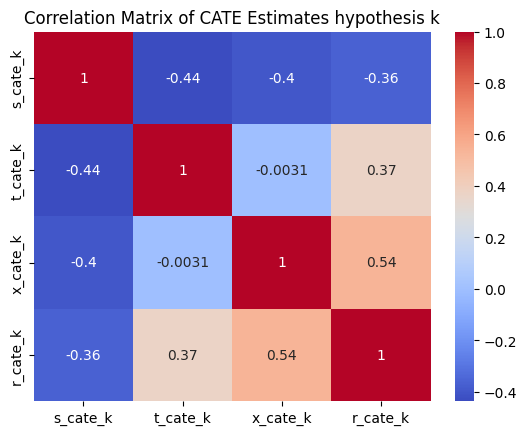

In [8]:
# Plot correlations between different CATE predictions
corr = merged_data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of CATE Estimates hypothesis k')
plt.show()

For Hypothesis K, the correlations reflect more pronounced divergence among the meta-learners. 
* The S-Learner exhibits moderate negative correlations with the T-Learner (-0.44), X-Learner (-0.4), and R-Learner (-0.36), highlighting substantial methodological differences. 
* The T-Learner shows no meaningful correlation with the X-Learner (-0.0031), indicating distinct processing of treatment effects, but exhibits moderate positive correlation with the R-Learner (0.37), suggesting some alignment in capturing treatment heterogeneity.

* The X-Learner and R-Learner display the strongest positive correlation (0.54), similar to Hypothesis P. This reinforces their shared capacity for sophisticated modeling of treatment effects. However, the overall correlations remain relatively weak across all meta-learners, suggesting considerable variability in the CATE estimates for Hypothesis K.

Across both hypotheses, the correlation matrices underscore significant variability in the CATE estimates produced by different meta-learners. These results emphasize the importance of considering multiple meta-learners to fully capture treatment heterogeneity and validate findings in diverse data scenarios.